In [1]:
import sys
import csv
import matplotlib.pyplot as plt

In [2]:
in_file_raw = open("Data/Consumer_Complaints_cleaned.csv", "r")

In [3]:
in_file = csv.reader(in_file_raw)

In [4]:
complaints = {}
next(in_file, None)
for line in in_file:
    if not line[7] in complaints:
        complaints[line[7]] = {}
    if not line[3] in complaints[line[7]]:
        complaints[line[7]][line[3]] = {}
    if not line[4] in complaints[line[7]][line[3]]:
        complaints[line[7]][line[3]][line[4]] = {"Yes":0,"No":0,"UNKNOWN":0}
    complaints[line[7]][line[3]][line[4]][line[16]] += 1

In [5]:
in_file_raw.close()

In [6]:
dispute_type_fractions = {}
for company in complaints:
    dispute_type_fractions[company] = {}
    total = 0
    for issue in complaints[company]:
        for subIssue in complaints[company][issue]:
            for response in complaints[company][issue][subIssue]:
                total += complaints[company][issue][subIssue][response]
    if total > 100:
        for issue in complaints[company]:
            for subIssue in complaints[company][issue]:
                fraction = complaints[company][issue][subIssue]["Yes"]/total
                dispute_type_fractions[company][issue + ": " + subIssue] = fraction

In [7]:
dispute_fractions = {}
for company in dispute_type_fractions:
    dispute_fractions[company] = sum(dispute_type_fractions[company].values())

In [13]:
out_file_raw = open("Data/too_many_disputes.txt", "w")
for company in dispute_fractions:
    if dispute_fractions[company] > .25:
        out_file_raw.write(company + "\n")
out_file_raw.close()

In [14]:
out_file_raw = open("Data/too_many_disputes_type.txt", "w")
for company in dispute_type_fractions:
    for issue in dispute_type_fractions[company]:
        if dispute_type_fractions[company][issue] > .12:
            out_file_raw.write(company + "\n")
            break
out_file_raw.close()

In [15]:
disp_frac_comp = []
disp_frac_values = []
num_disp_frac = 0
selector = 0
for company in dispute_fractions:
    if dispute_fractions[company] > .1:
        if selector == 10:
            disp_frac_comp.append(company)
            disp_frac_values.append(dispute_fractions[company])
            num_disp_frac += 1
            selector = 0
        else:
            selector += 1

In [16]:
disp_frac_comp_sort = [t2 for (t1,t2) in sorted(zip(disp_frac_values,disp_frac_comp))]
disp_frac_values_sort = sorted(disp_frac_values)

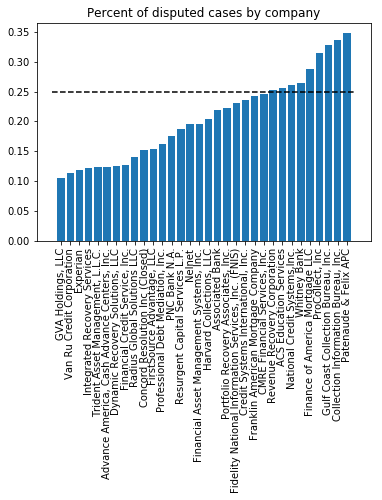

In [17]:
plt.figure()
plt.bar(range(num_disp_frac), disp_frac_values_sort, align='center')
plt.plot([-1, 32], [.25, .25], "k--")
plt.xticks(range(num_disp_frac), disp_frac_comp_sort, rotation='vertical')
plt.title("Percent of disputed cases by company")
plt.show()

In [18]:
def plotDictionaryWtihThreshold(dictionary, threshold, title, location):
    fields = []
    values = []
    num_entries = 0
    for field in dictionary:
        fields.append(field)
        values.append(dictionary[field])
        num_entries += 1
    fields_sort = [t2 for (t1,t2) in sorted(zip(values,fields))]
    values_sort = sorted(values)
    plt.figure()
    plt.bar(range(num_entries), values_sort, align='center')
    plt.plot([-1, num_entries], [threshold, threshold], "k--")
    plt.xticks(range(num_entries), fields_sort, rotation='vertical')
    plt.title(title)
    plt.savefig(location, dpi = 300, bbox_inches='tight')
    plt.show()

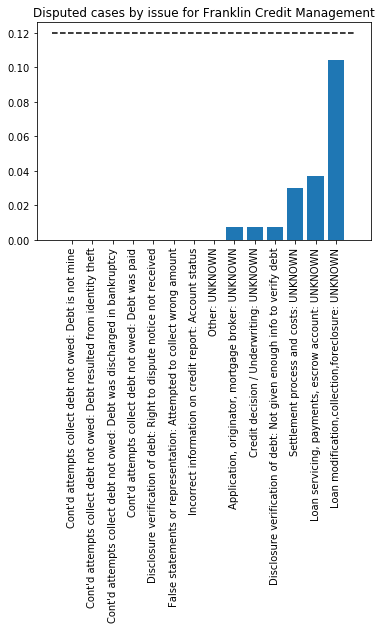

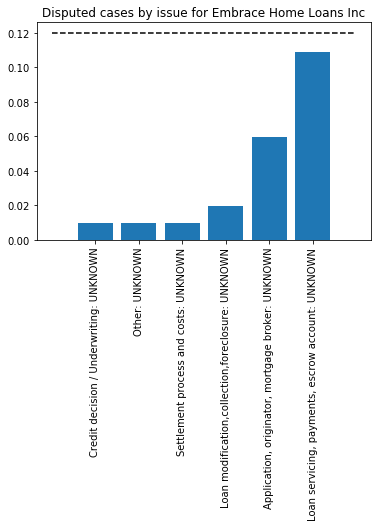

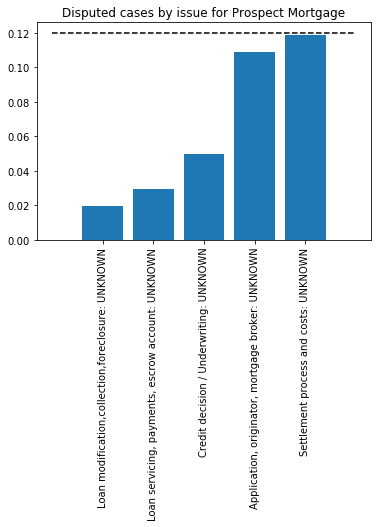

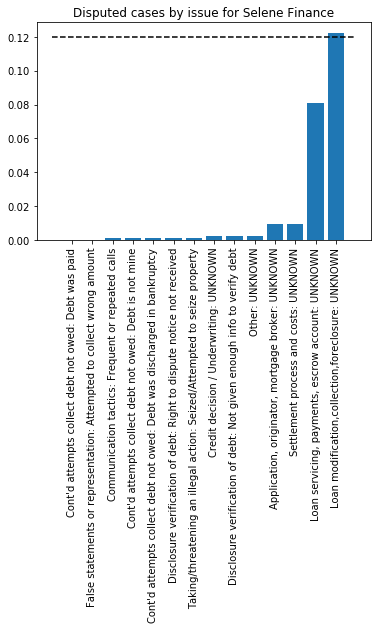

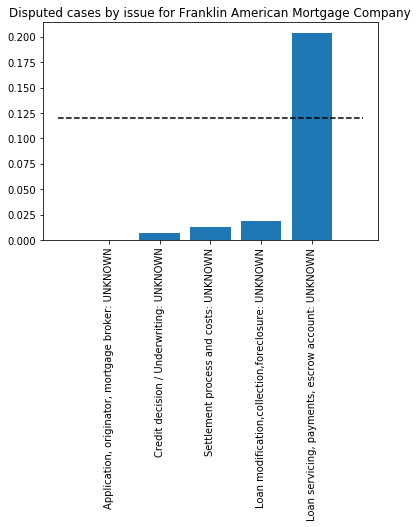

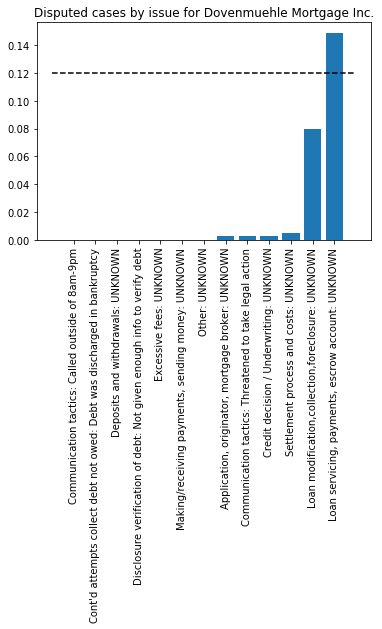

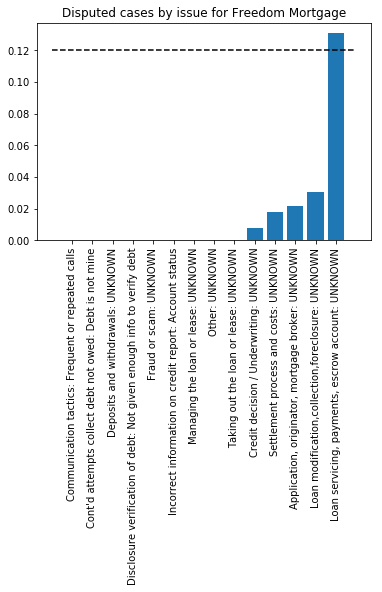

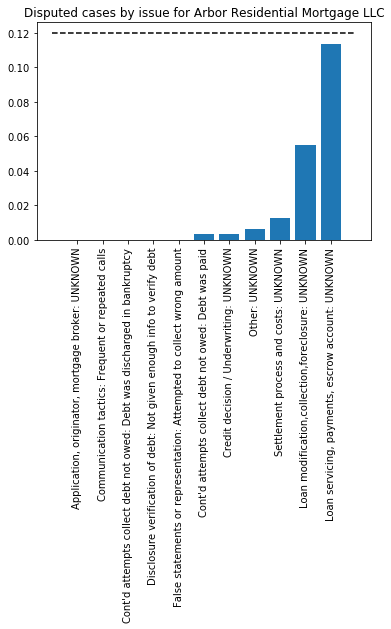

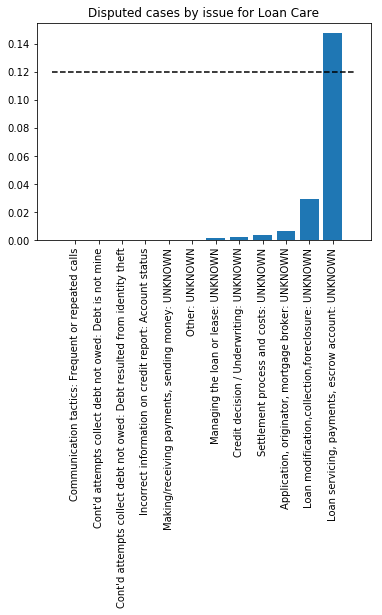

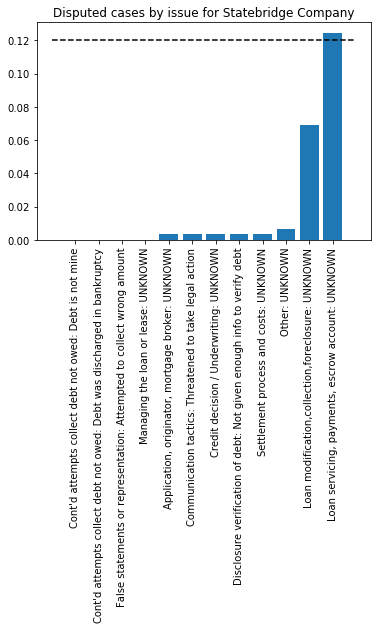

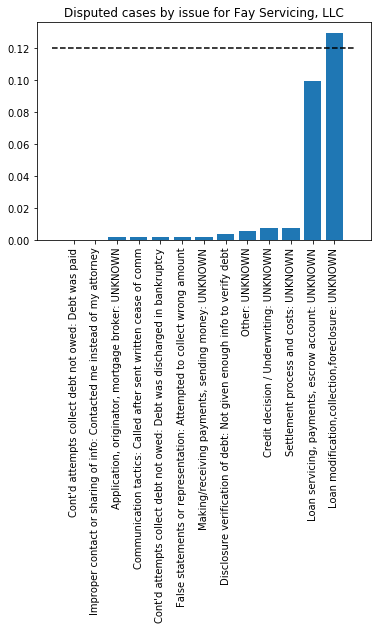

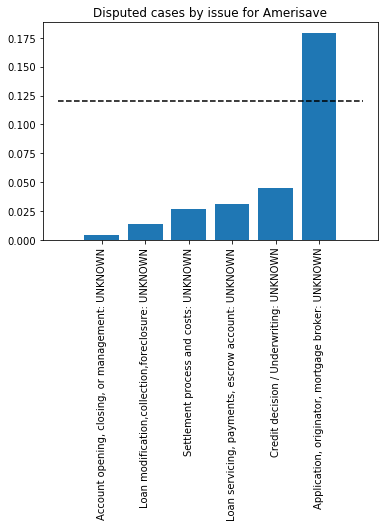

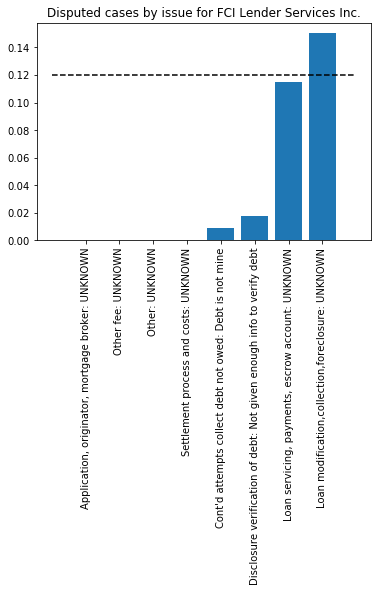

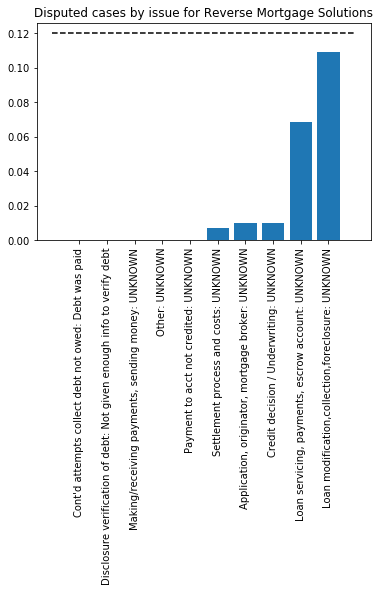

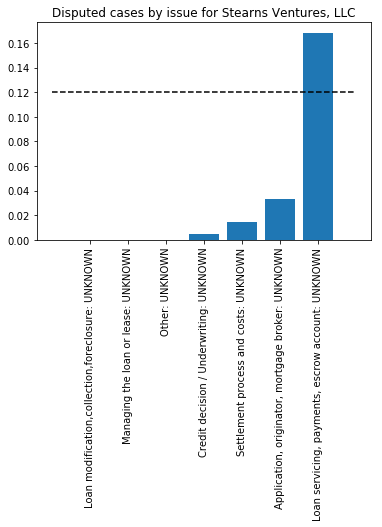

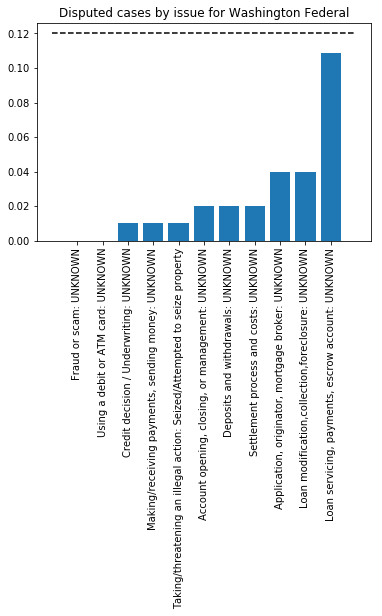

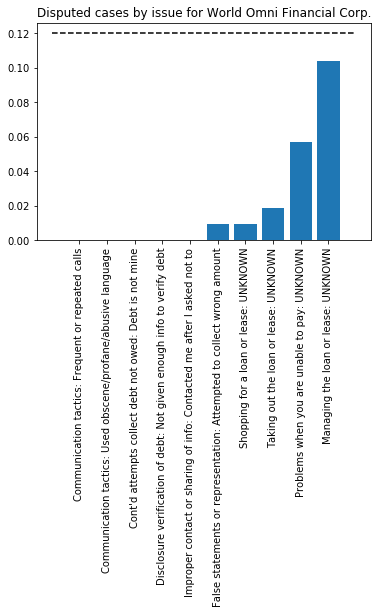

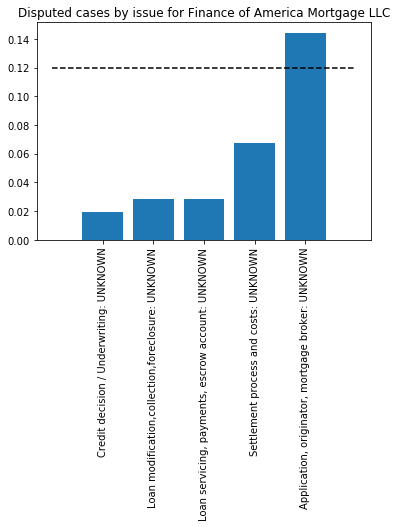

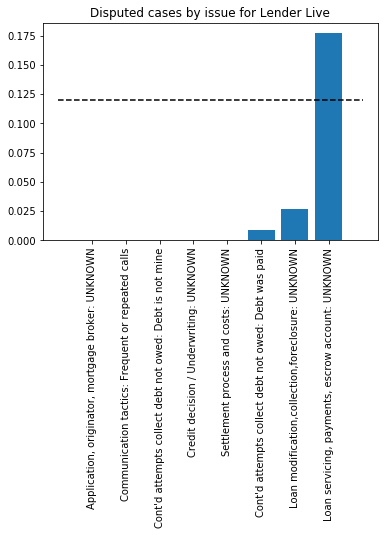

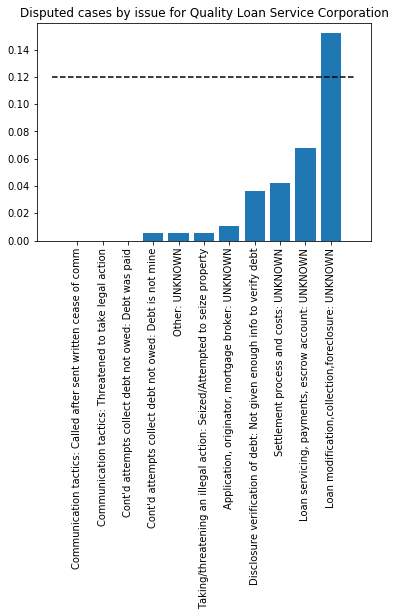

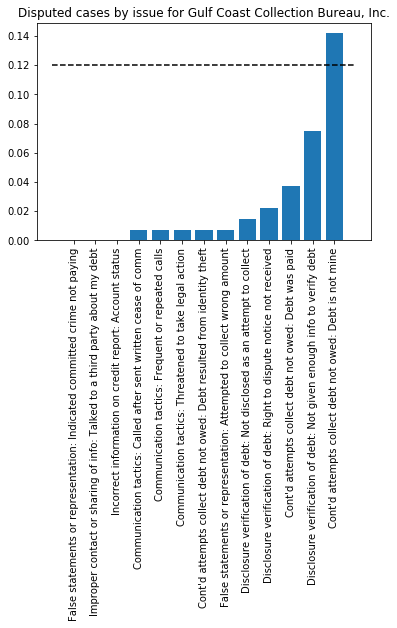

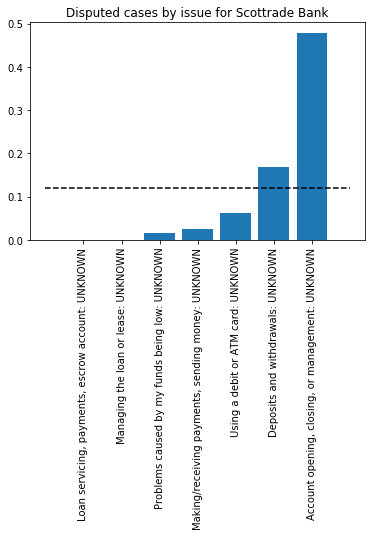

In [19]:
selector = 0
for company in dispute_type_fractions:
    plot = False
    num_fields = 0
    for issue in dispute_type_fractions[company]:
        num_fields += 1
        if dispute_type_fractions[company][issue] > .1:
            plot = True
    if num_fields >= 15:
        plot = False
    if plot == True:
        plotDictionaryWtihThreshold(dispute_type_fractions[company], .12, "Disputed cases by issue for " + company, "Images/Disputed_Issues_Plots/" + company)